In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd
from tqdm import tqdm
import os
import os
from sklearn.metrics import confusion_matrix

# change the following path

In [2]:
# battery_brand123
df0_actual = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134410fold_0/actual.txt.npy')
df0_car_charge_segment = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134410fold_0/car_charge_segment.txt.npy')
df0_car_head = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134410fold_0/car_head.txt.npy')
df0_car_nums = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134410fold_0/car_nums.txt.npy')
df0_preds = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134410fold_0/preds.txt.npy')
df0_recons = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134410fold_0/recons.txt.npy')

df1_actual = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134418fold_1/actual.txt.npy')
df1_car_charge_segment = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134418fold_1/car_charge_segment.txt.npy')
df1_car_head = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134418fold_1/car_head.txt.npy')
df1_car_nums = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134418fold_1/car_nums.txt.npy')
df1_preds = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134418fold_1/preds.txt.npy')
df1_recons = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134418fold_1/recons.txt.npy')

df2_actual = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134427fold_2/actual.txt.npy')
df2_car_charge_segment = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134427fold_2/car_charge_segment.txt.npy')
df2_car_head = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134427fold_2/car_head.txt.npy')
df2_car_nums = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134427fold_2/car_nums.txt.npy')
df2_preds = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134427fold_2/preds.txt.npy')
df2_recons = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134427fold_2/recons.txt.npy')

df3_actual = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134441fold_3/actual.txt.npy')
df3_car_charge_segment = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134441fold_3/car_charge_segment.txt.npy')
df3_car_head = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134441fold_3/car_head.txt.npy')
df3_car_nums = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134441fold_3/car_nums.txt.npy')
df3_preds = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134441fold_3/preds.txt.npy')
df3_recons = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134441fold_3/recons.txt.npy')

df4_actual = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134453fold_4/actual.txt.npy')
df4_car_charge_segment = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134453fold_4/car_charge_segment.txt.npy')
df4_car_head = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134453fold_4/car_head.txt.npy')
df4_car_nums = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134453fold_4/car_nums.txt.npy')
df4_preds = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134453fold_4/preds.txt.npy')
df4_recons = np.load('../mtad-gat-pytorch-modified/output/BATTERY_BRAND123/20052023_134453fold_4/recons.txt.npy')

In [3]:
# brand123
ind_ood_car_dict = np.load('../five_fold_utils/ind_odd_dict.npz.npy', allow_pickle=True).item()
ind_car_num_list = ind_ood_car_dict['ind_sorted']
ood_car_num_list = ind_ood_car_dict['ood_sorted']
all_car_num_list = set(ind_car_num_list + ood_car_num_list)

print(len(ind_car_num_list))
print(len(ood_car_num_list))

416
48


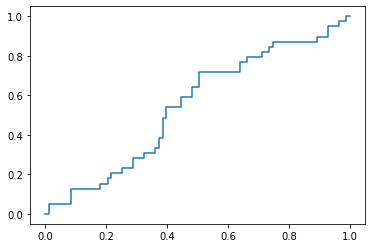

0.5464936669755948


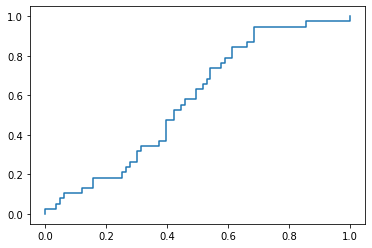

0.5764109067850349


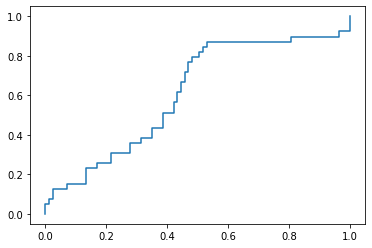

0.6122953351869014


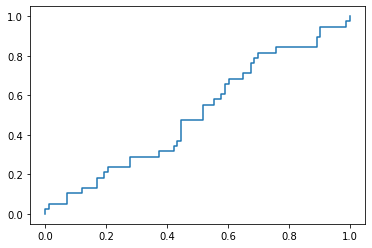

0.5060240963855421


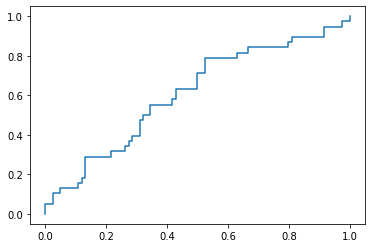

0.6083959899749374
AUC mean  0.5699239990616022


In [8]:
AUC_fivefold_list = []
gamma = 1

for i in range(5):
# for i in [4]:
    fold_num = i
    
    validation_car_number = ind_car_num_list[:int(fold_num * len(ind_car_num_list) / 5)] + ind_car_num_list[int((fold_num + 1) * len(ind_car_num_list) / 5):] + ood_car_num_list[int(fold_num * len(ood_car_num_list) / 5):int((fold_num + 1) * len(ood_car_num_list) / 5)]
    # test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]
    test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]
    
    
    df_actual = eval('df'+str(fold_num)+'_actual')
    df_car_charge_segment = eval('df'+str(fold_num)+'_car_charge_segment')
    df_car_head = eval('df'+str(fold_num)+'_car_head')
    df_car_nums = eval('df'+str(fold_num)+'_car_nums')
    df_preds = eval('df'+str(fold_num)+'_preds')
    df_recons = eval('df'+str(fold_num)+'_recons')
    
    anomaly_scores = np.zeros_like(df_actual)
    for i in range(df_preds.shape[1]):
        a_score = np.sqrt((df_preds[:, i] - df_actual[:, i]) ** 2) + gamma * np.sqrt((df_recons[:, i] - df_actual[:, i]) ** 2)
        anomaly_scores[:, i] = a_score
    anomaly_scores = np.mean(anomaly_scores, 1)
    
    label = np.zeros_like(df_car_nums)
    for each in df_car_nums:
        if each in ind_car_num_list:
            label[each] = 0
        else:
            label[each] = 1
    
    data = np.vstack((label, df_car_nums, anomaly_scores)).T

    ind_car_score = []
    ood_car_score = []

    for each_car_num in test_car_number:
        this_car_score = np.mean(data[np.where(data[:, 1]==each_car_num)][:, 2])
        if each_car_num in ind_car_num_list:
            ind_car_score.append(this_car_score)
        else:
            ood_car_score.append(this_car_score)
    #     print(each_car_num, len(this_car_score))
    
    label = [1] * len(ood_car_score) + [0] * len(ind_car_score)
    score = np.hstack((ood_car_score, ind_car_score))

    fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
    plt.plot(fpr, tpr)
    plt.show()
    AUC = auc(fpr, tpr)
    print(AUC)

    np.save('../mtad-gat-pytorch-modified/robust_no_battery_brand123/average_all_score_fold%d.npy' % fold_num, score)
    np.save('../mtad-gat-pytorch-modified/robust_no_battery_brand123/average_labels_fold%d.npy' % fold_num, label)
    
    AUC_fivefold_list.append(AUC)
    
print('AUC mean ', np.mean(AUC_fivefold_list))


In [17]:
print(AUC_fivefold_list)

[0.6114999999999999, 0.627, 0.606, 0.618, 0.6019607843137256]


In [18]:
print(np.mean(AUC_fivefold_list))
print(np.std(AUC_fivefold_list))

0.6128921568627451
0.00887756872411386
